<img src="logoUva.png" alt="Drawing" style="width: 500px;"/>

# Web crawling example for the University of Amsterdam

The purpose of this example is to demonstrate my ability to collect, work with, clean, and obtain valuable information from different URLs related to the communication domain analysing the lexical-syntactical structure of texts. The idea is to response (in a first attempt) to a simple question: __What do newspapers pay attention to?__ 

Example features:

1. All the code was implemented in Python 2.7 https://www.python.org/
2. The URLS are obtained from the [Wayback archive](http://archive.org/web/), [New york times](https://www.nytimes.com/)  and [CNN](https://edition.cnn.com/) websites. The following are the URLS analyzed:
    *https://web.archive.org/web/20170815211259/http://www.foxnews.com/world/2017/08/14/kim-jong-uns-disappearance-sparks-concerns-missile-launch-could-be-imminent.html
    
    *https://www.nytimes.com/2018/04/20/us/politics/trump-michael-cohen.html?hp&action=click&pgtype=Homepage&clickSource=story-heading&module=first-column-region&region=top-news&WT.nav=top-news
    
    *https://edition.cnn.com/2018/04/20/politics/trump-legal-team-reset-russia-mueller/index.html
3. The  Python packages required to run the programs are the following:

    * Jupyter notebook (Python interactive prompt) http://jupyter.org/index.html
	* Newspaper https://github.com/codelucas/newspaper/tree/python-2-head
	* NLTK (NLP techniques) https://www.nltk.org/
	* CLips pattern (NLP techniques) https://www.clips.uantwerpen.be/pattern
    * Matplotlib (visualization) https://matplotlib.org/
    * WordCloud (visualization) https://pypi.python.org/pypi/wordcloud

## Obtain the titles and authors of the selected news

For each of the URLs selected obtain the news titles and authors following the next steps:

*  Save the news URLs in a Python list

In [109]:
urls=[]
#URLs selected for the analysis
urls.append("https://www.nytimes.com/2018/04/20/us/politics/trump-michael-cohen.html?hp&action=click&pgtype=Homepage&clickSource=story-heading&module=first-column-region&region=top-news&WT.nav=top-news")
urls.append("https://web.archive.org/web/20170815211259/http://www.foxnews.com/world/2017/08/14/kim-jong-uns-disappearance-sparks-concerns-missile-launch-could-be-imminent.html")
urls.append("https://edition.cnn.com/2018/04/20/politics/trump-legal-team-reset-russia-mueller/index.html")

*  For each URL get the caption searching for the __title__ label in the HTML using the BeautifulSoup package. In the case of the autors, parse the URL using the newspaper package.

In [110]:
import urllib2
from newspaper import Article
from BeautifulSoup import BeautifulSoup
titles=[]
counter=1
for url in urls:
    print "Article "+str(counter)
    #Obtain each URL title
    soup = BeautifulSoup(urllib2.urlopen(url))
    print "Title: "+str(soup.title.string)
    titles.append(soup.title.string)
    try:
        #Obtain the author of the URL
        article = Article(url)
        article.download()
        article.parse()
        authors= article.authors
    except:
        authors=[]
        pass
    if not authors:
        print "Authors: Unknown"
    else:
        print "Authors: " +(" and ".join(authors)) 
    counter=counter+1    

Article 1
Title: Michael Cohen Has Said He Would Take a Bullet for Trump. Maybe Not Anymore. - The New York Times
Authors: Sharon Lafraniere and Danny Hakim and Maggie Haberman
Article 2
Title: Kim Jong Un's disappearance sparks concerns missile launch could be imminent | Fox News
Authors: Unknown
Article 3
Title: Trump legal team brings fresh firepower to reset with Mueller - CNNPolitics
Authors: Sara Murray and Gloria Borger and Evan Perez


## Get the news content


Get the HTML associated to each URL and transform it to raw text using the BeautifulSoup package and some regex instructions.


In [111]:
import urllib
import re
from bs4 import BeautifulSoup
textList=[]
counter=1
for url in urls:
    #Parse the URL to a python stream
    html = urllib.urlopen(url).read()
    #Access the URLs textual information
    soup = BeautifulSoup(html)
    #Eliminate all the HTML tags
    for script in soup(["script", "style"]):
        script.extract()
    #Get raw texts    
    text = soup.get_text()
    #eliminates all the information that is not part of the ASCCI encoding
    text = re.sub('[^A-Za-z0-9 ]+', ' ',text.lower())
    #Eliminates tabs and new lines
    text =re.sub(' +',' ',text)
    text = text.replace('\n',' ')
    text = text.replace('\t',' ')
    #Store the texts into a Python list
    textList.append(text)
    print "URL "+str(counter)+" content example:"
    #Show a brief summary of each of the texts collected
    print text [:700]+"\n"
    counter=counter+1 

URL 1 content example:
 michael cohen has said he would take a bullet for trump maybe not anymore the new york times nytimes com no longer supports internet explorer 9 or earlier please upgrade your browser learn more sections home search skip to content skip to navigation view mobile version the new york times politics michael cohen has said he would take a bullet for trump maybe not anymore search subscribe now log in 0 settings close search site search navigation search nytimes com clear this text input go https nyti ms 2vuwhyz loading see next articles see previous articles site navigation site mobile navigation advertisement supported by politics michael cohen has said he would take a bullet for trump maybe n

URL 2 content example:
 kim jong un s disappearance sparks concerns missile launch could be imminent fox news success fail jul aug sep 15 2016 2017 2018 51 captures 15 aug 2017 16 dec 2017 about this capture collected by organization internet archive focused crawls are colle

## Content analysis and comparison

The following steps show the different elements obtained from the analysis and comparison of the textual information associated to each URL using some Natural language processing and visualization techniques.

*  For each URL, plot a word cloud that help us to see the main topics discussed (individually). The wordCloud package was used due to the practical nature of the tool to create complex word clouds.

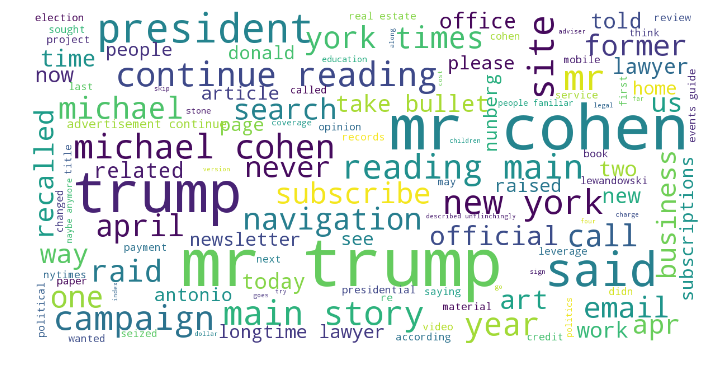

In [112]:
# URL 1 word cloud
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
featuresWordCloud='\t'.join(textList[0].split(" "))
wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=400,
        max_font_size=40, 
        scale=3,
        random_state=1).generate(str(featuresWordCloud))
fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

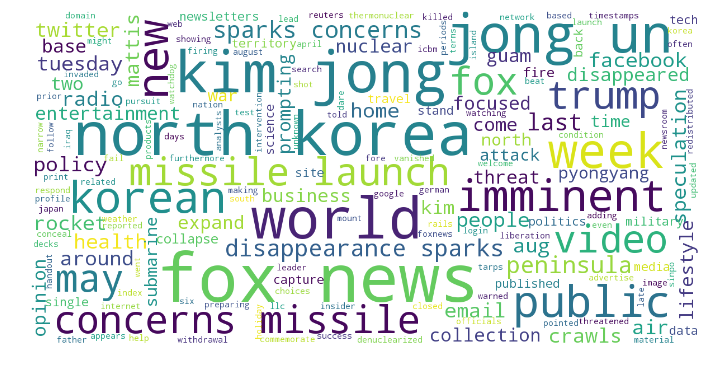

In [113]:
# URL 2 word cloud
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
featuresWordCloud='\t'.join(textList[1].split(" "))
wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=400,
        max_font_size=40, 
        scale=3,
        random_state=1).generate(str(featuresWordCloud))
fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

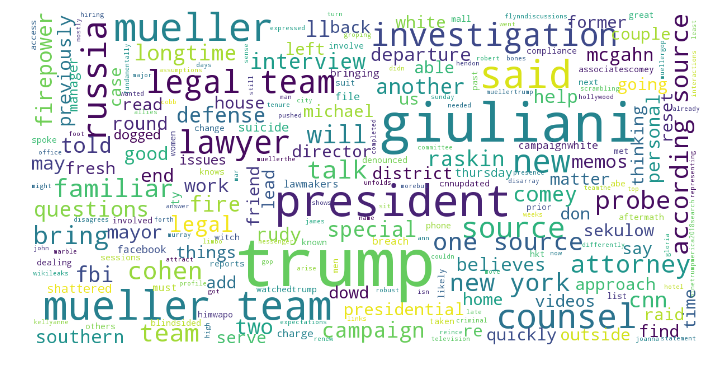

In [114]:
# URL 3 word cloud
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
featuresWordCloud='\t'.join(textList[2].split(" "))
wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=400,
        max_font_size=40, 
        scale=3,
        random_state=1).generate(str(featuresWordCloud))
fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

* Obtain the Part of speech Tags (PoS tags) associated to each URL. The PoS tags helps us to see the lexical-syntactical role of words in the URLs. The clips pattern package is used for obtaining PoS tags because it has a complete parser in different languages (including English).

In [115]:
from pattern.en import parse
PoSTagList=[]
for text in textList:
  elementsParser=parse(text)
  PoSTags=[]
  for PoSTag in elementsParser.split(" "):
    elements=PoSTag.split("/")
    PoSTags.append((elements[0],elements[1]))
  PoSTagList.append(PoSTags)
#Print the first 50 PoS tags
print PoSTagList[0][:50]
 

[(u'michael', u'NNS'), (u'cohen', u'RB'), (u'has', u'VBZ'), (u'said', u'VBD'), (u'he', u'PRP'), (u'would', u'MD'), (u'take', u'VB'), (u'a', u'DT'), (u'bullet', u'NN'), (u'for', u'IN'), (u'trump', u'NN'), (u'maybe', u'RB'), (u'not', u'RB'), (u'anymore', u'RB'), (u'the', u'DT'), (u'new', u'NNP-LOC'), (u'york', u'NNP-LOC'), (u'times', u'NNS'), (u'nytimes', u'RB'), (u'com', u'NN'), (u'no', u'RB'), (u'longer', u'RB'), (u'supports', u'VBZ'), (u'internet', u'NNP'), (u'explorer', u'NNP'), (u'9', u'CD'), (u'or', u'CC'), (u'earlier', u'RBR'), (u'please', u'VB'), (u'upgrade', u'JJ'), (u'your', u'PRP$'), (u'browser', u'NN'), (u'learn', u'VBP'), (u'more', u'JJR'), (u'sections', u'NNS'), (u'home', u'NN'), (u'search', u'NN'), (u'skip', u'NN'), (u'to', u'TO'), (u'content', u'VB'), (u'skip', u'NN'), (u'to', u'TO'), (u'navigation', u'NN'), (u'view', u'NN'), (u'mobile', u'JJ'), (u'version', u'NN'), (u'the', u'DT'), (u'new', u'NNP-LOC'), (u'york', u'NNP-LOC'), (u'times', u'NNS')]


* Obtain all the NN-nouns, adjectives-JJ and verbs-VB (in all variants) in order to see the intersections among topics, entities, places, actions, attributes, etc. in the URLs.

In [116]:
elements=["NN","NNS","NNP","NNPS","VB","VBZ","VBP","VBD","VBN","VBG", "JJ", "JJR", "JJS"]
PoSwordsList=[]
for postags in PoSTagList:
   PoSwordsList.append([x for x in postags if x[1] in elements])
#Print the first 50 noun PoS tags 
PoSwordsList[0][:50]

[(u'michael', u'NNS'),
 (u'has', u'VBZ'),
 (u'said', u'VBD'),
 (u'take', u'VB'),
 (u'bullet', u'NN'),
 (u'trump', u'NN'),
 (u'times', u'NNS'),
 (u'com', u'NN'),
 (u'supports', u'VBZ'),
 (u'internet', u'NNP'),
 (u'explorer', u'NNP'),
 (u'please', u'VB'),
 (u'upgrade', u'JJ'),
 (u'browser', u'NN'),
 (u'learn', u'VBP'),
 (u'more', u'JJR'),
 (u'sections', u'NNS'),
 (u'home', u'NN'),
 (u'search', u'NN'),
 (u'skip', u'NN'),
 (u'content', u'VB'),
 (u'skip', u'NN'),
 (u'navigation', u'NN'),
 (u'view', u'NN'),
 (u'mobile', u'JJ'),
 (u'version', u'NN'),
 (u'times', u'NNS'),
 (u'politics', u'NNS'),
 (u'michael', u'VBP'),
 (u'has', u'VBZ'),
 (u'said', u'VBD'),
 (u'take', u'VB'),
 (u'bullet', u'NN'),
 (u'trump', u'NN'),
 (u'search', u'NN'),
 (u'subscribe', u'NN'),
 (u'log', u'VBP'),
 (u'settings', u'NNS'),
 (u'close', u'JJ'),
 (u'search', u'NN'),
 (u'site', u'NN'),
 (u'search', u'NN'),
 (u'navigation', u'NN'),
 (u'search', u'NN'),
 (u'nytimes', u'VBZ'),
 (u'com', u'NN'),
 (u'text', u'NN'),
 (u'inpu

* Obtain the __nouns, adjectives and verbs__ itersection among the URLs.

In [117]:
wordsList=[]
for PoSwords in PoSwordsList:
   wordsList.append([x[0] for x in PoSwords])
wordsList=[set(x) for x in wordsList]
intersection=list((reduce((lambda x,y: x&y),wordsList)))
print intersection[:50]


[u'help', u'had', u'is', u'been', u'have', u'world', u'home', u'trump', u'adding', u'end', u'top', u'fox', u'least', u'other', u'new', u'weeks', u'has', u'was', u'told', u'be', u'fire', u'focused', u'news', u'country', u'days', u'april', u's', u'time', u'went', u'more', u'are']


* Obtain __all the words__ itersection among the URLs.

In [118]:
wordsList2=[set([x[0] for x in y]) for y in PoSTagList]
intersection=list((reduce((lambda x,y: x&y),wordsList2)))
print intersection[:100]
    

[u'and', u'the', u'all', u'trump', u'help', u'also', u'had', u'is', u'in', u'back', u'an', u'as', u'been', u'are', u'have', u'news', u'home', u'close', u'out', u'adding', u'what', u'from', u'for', u'no', u'top', u'fox', u'two', u'least', u'should', u'to', u'other', u'2018', u'which', u'time', u'new', u'weeks', u'2016', u'was', u'told', u'be', u'his', u'may', u'around', u'that', u'fire', u'end', u'it', u'focused', u'not', u'world', u'with', u'by', u'he', u'a', u'on', u'about', u'has', u'would', u'this', u'country', u'could', u'when', u'days', u'us', u'april', u's', u'can', u'of', u'went', u'more', u'at']


*  Extract key phrases(collocations) from each text. which are indicative of some sort of syntactic patterns in the URLs. In this case the NLTK package is used because it has a set of easy to use and open tools for collocations.

In [119]:
import nltk
from nltk.collocations import *
from nltk.tokenize import word_tokenize
bigramMeasures = nltk.collocations.BigramAssocMeasures()
counter=1 
for text in textList:
    print "URL "+str(counter)
    finder = BigramCollocationFinder.from_words(word_tokenize(text))
    #Print the 70 most popular bigrams in the URLs
    print finder.nbest(bigramMeasures.pmi, 70)
    counter=counter+1

URL 1
[(u'0', u'settings'), (u'abortive', u'run'), (u'abusive', u'behavior'), (u'account', u'nytco'), (u'ad', u'choices'), (u'affliction', u'entertainment'), (u'agents', u'raided'), (u'alerts', u'gift'), (u'alleged', u'without'), (u'already', u'subscribed'), (u'american', u'pastor'), (u'americans', u'muslims'), (u'angrily', u'telling'), (u'any', u'evidence'), (u'anyone', u'complains'), (u'anytime', u'prosecutors'), (u'applications', u'replica'), (u'army', u'veteran'), (u'art', u'design'), (u'associated', u'press'), (u'attract', u'support'), (u'avenue', u'where'), (u'bat', u'mitzvahs'), (u'become', u'resigned'), (u'bill', u'clinton'), (u'bloc', u'including'), (u'books', u'dance'), (u'box', u'invalid'), (u'boxing', u'wrestling'), (u'browser', u'learn'), (u'caused', u'her'), (u'celebrations', u'listings'), (u'center', u'classifieds'), (u'chief', u'operating'), (u'claim', u'they'), (u'classifieds', u'tools'), (u'clearly', u'doesn'), (u'clifford', u'known'), (u'clout', u'order'), (u'cole', 

* Obtain the overall sentiment based on the text content using the sentiment analysis from clips patter package. __The sentiment  polarity is a value between -1.0 (totally negative) and +1.0 (totally positive)__. The sentiment give us a glimpse of what kind of news article we are working on and what kind of message is spreading to the audience.

In [120]:
from pattern.en import sentiment
counter=1
for text,title in zip(textList,titles):
    print "URL "+str(counter)+" title: "+title
    print "Sentiment: "+str(sentiment(text)[0])
    counter=counter+1

URL 1 title: Michael Cohen Has Said He Would Take a Bullet for Trump. Maybe Not Anymore. - The New York Times
Sentiment: 0.0758075933076
URL 2 title: Kim Jong Un's disappearance sparks concerns missile launch could be imminent | Fox News
Sentiment: -0.0471917839105
URL 3 title: Trump legal team brings fresh firepower to reset with Mueller - CNNPolitics
Sentiment: 0.0820200817701
